<a href="https://colab.research.google.com/github/LekhashreeMallapur/test/blob/master/is_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qrcode[pil] pycryptodome scikit-image opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.5 MB/s eta 0:00:00


In [3]:
LBP_RADIUS = 3
LBP_POINTS = 8 * LBP_RADIUS
DES3_BLOCK_SIZE = 8

In [4]:
def generate_3des_key(password: str) -> bytes:
    """Generate a valid DES3 key from a password."""
    password_bytes = password.encode('utf-8')
    key = password_bytes[:24] if len(password_bytes) >= 24 else password_bytes.ljust(24, b'\0')
    return key

def encrypt_qr_data(data: str, key: bytes) -> str:
    """Encrypt QR code data using 3DES."""
    cipher = DES3.new(key, DES3.MODE_ECB)
    encrypted_data = cipher.encrypt(pad(data.encode('utf-8'), DES3_BLOCK_SIZE))
    return base64.b64encode(encrypted_data).decode('utf-8')

def decrypt_qr_data(encrypted_data: str, key: bytes) -> str:
    """Decrypt QR code data using 3DES."""
    cipher = DES3.new(key, DES3.MODE_ECB)
    decrypted_data = unpad(cipher.decrypt(base64.b64decode(encrypted_data)), DES3_BLOCK_SIZE)
    return decrypted_data.decode('utf-8')

def generate_qr(data: str, output_path: str):
    """Generate a QR code."""
    qr = qrcode.QRCode(version=1, box_size=10, border=5)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill='black', back_color='white')
    img.save(output_path)

def apply_lbp(image_path: str) -> np.ndarray:
    """Apply LBP to extract features from a face image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    lbp_image = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='uniform')
    return lbp_image

def verify_lbp(lbp1: np.ndarray, lbp2: np.ndarray) -> bool:
    """Compare two LBP feature sets."""
    return np.array_equal(lbp1, lbp2)


In [5]:
def register_user(face_image_path: str, password: str, output_dir: str):
    """Register a user by processing their face and creating a QR code."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

In [12]:
from skimage.feature import local_binary_pattern


In [13]:
pip install scikit-image


In [18]:
import os
print(os.getcwd())  # This prints the current working directory


/content


In [19]:
face_image_path = "./face_image.jpg"  # Relative path if the image is in the current directory


In [20]:
import os
print(os.listdir(os.getcwd()))  # List all files in the current working directory


['.config', '.ipynb_checkpoints', 'user_data', 'face_image.jpg', 'sample_data']


In [21]:
face_image_path = "./face_image.jpg"  # Update with the correct path


In [22]:
import os
import numpy as np

# Output directory
output_dir = "./"  # You can set a specific output folder

# Extract LBP features from the face image
lbp_features = apply_lbp(face_image_path)

# Save LBP features to a file
face_data_path = os.path.join(output_dir, 'face_lbp.npy')
np.save(face_data_path, lbp_features)
print("[INFO] Face LBP features saved to:", face_data_path)


[INFO] Face LBP features saved to: ./face_lbp.npy


In [23]:
loaded_lbp_features = np.load(face_data_path)
print("[INFO] Loaded LBP features:", loaded_lbp_features)


[INFO] Loaded LBP features: [[3. 5. 5. ... 5. 5. 3.]
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 ...
 [4. 5. 4. ... 4. 4. 4.]
 [5. 5. 4. ... 5. 5. 5.]
 [2. 2. 3. ... 2. 2. 2.]]


In [24]:
import numpy as np

# Load the saved LBP features
face_data_path = './face_lbp.npy'  # Adjust the path if needed
lbp_features = np.load(face_data_path)

# Print the LBP features or shape
print("[INFO] LBP Features Shape:", lbp_features.shape)
print("[INFO] LBP Features Data:", lbp_features)


[INFO] LBP Features Shape: (272, 212)
[INFO] LBP Features Data: [[3. 5. 5. ... 5. 5. 3.]
 [5. 8. 8. ... 8. 8. 5.]
 [5. 8. 8. ... 8. 8. 5.]
 ...
 [4. 5. 4. ... 4. 4. 4.]
 [5. 5. 4. ... 5. 5. 5.]
 [2. 2. 3. ... 2. 2. 2.]]


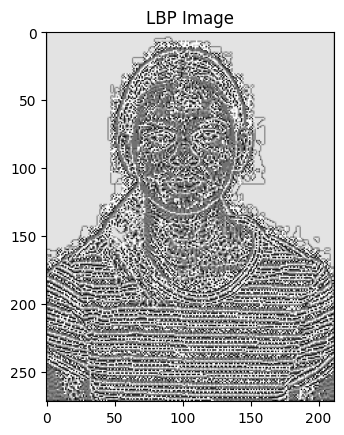

In [25]:
import matplotlib.pyplot as plt

plt.imshow(lbp_features, cmap='gray')
plt.title('LBP Image')
plt.show()


In [26]:
import qrcode

def generate_qr_code(data, file_path):
    """Generate a QR code from input data."""
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    # Create an image from the QR code
    img = qr.make_image(fill="black", back_color="white")
    img.save(file_path)
    print(f"QR code generated and saved at {file_path}")

# Example Usage:
data = "unique_user_data_for_authentication"
generate_qr_code(data, "user_qr_code.png")


QR code generated and saved at user_qr_code.png


In [29]:
!pip install pyzbar

In [32]:
!apt-get install -y libzbar0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [33]:
!pip install pyzbar


In [34]:
import cv2
from pyzbar.pyzbar import decode

def decode_qr_code(image_path):
    """Decode the QR code from an image."""
    image = cv2.imread(image_path)
    decoded_objects = decode(image)

    for obj in decoded_objects:
        return obj.data.decode('utf-8')  # Return the decoded data from the QR code

    return None  # Return None if no QR code is found

# Example Usage:
qr_data = decode_qr_code('user_qr_code.png')
print(f"Decoded QR Code Data: {qr_data}")


Decoded QR Code Data: unique_user_data_for_authentication


In [37]:
def verify_password(input_password, stored_password):
    """Verify if the input password matches the stored password."""
    return input_password == stored_password

# Example Usage:
stored_password = "user_password"  # You can set this password however you'd like (hardcoded or from a secure source)
input_password = input("Enter your password: ")

if verify_password(input_password, stored_password):
    print("Password verified successfully!")
else:
    print("Invalid password.")


Enter your password: user_password
Password verified successfully!


In [39]:
import cv2
import numpy as np
import qrcode
from pyzbar.pyzbar import decode
from skimage.feature import local_binary_pattern

# Constants
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS
DES3_BLOCK_SIZE = 8

# Helper Functions

# 1. QR Code Generation
def generate_qr_code(data, file_path):
    qr = qrcode.QRCode(version=1, box_size=10, border=4)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill="black", back_color="white")
    img.save(file_path)
    print(f"QR code generated at {file_path}")

# 2. QR Code Decryption
def decode_qr_code(image_path):
    image = cv2.imread(image_path)
    decoded_objects = decode(image)
    for obj in decoded_objects:
        return obj.data.decode('utf-8')
    return None  # If no QR code is found

# 3. LBP Feature Extraction for Face Recognition
def apply_lbp(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    lbp_image = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='uniform')
    return lbp_image

def verify_lbp(lbp1, lbp2):
    return np.array_equal(lbp1, lbp2)

# 4. Password Verification
def verify_password(input_password, stored_password):
    return input_password == stored_password

# Offline 3-Factor Authentication
def offline_3_factor_authentication():
    # 1. QR Code Authentication
    qr_data = decode_qr_code('user_qr_code.png')
    if qr_data is None:
        print("QR code verification failed!")
        return False
    print(f"QR Code verified: {qr_data}")

    # 2. Face Recognition Authentication (LBP Comparison)
    stored_face_image = 'face_image.jpg'  # Path to registered face image
    input_face_image = 'face_image.jpg'  # Path to input face image during login
    stored_lbp = apply_lbp(stored_face_image)
    input_lbp = apply_lbp(input_face_image)

    if not verify_lbp(stored_lbp, input_lbp):
        print("Face recognition failed!")
        return False
    print("Face verified successfully!")

    # 3. Password Authentication
    stored_password = "user_password"
    input_password = input("Enter your password: ")
    if not verify_password(input_password, stored_password):
        print("Password verification failed!")
        return False
    print("Password verified successfully!")

    # If all three factors are verified
    print("Offline 3-Factor Authentication successful!")
    return True

# Run Offline 3-Factor Authentication
offline_3_factor_authentication()


QR Code verified: unique_user_data_for_authentication
Face verified successfully!
Enter your password: user_password
Password verified successfully!
Offline 3-Factor Authentication successful!


True

In [40]:
from Crypto.Cipher import DES3
from Crypto.Util.Padding import pad
import base64

# Function to generate a 3DES key from the password
def generate_3des_key(password):
    password_bytes = password.encode('utf-8')
    key = password_bytes[:24] if len(password_bytes) >= 24 else password_bytes.ljust(24, b'\0')
    return key

# Encrypt the QR code data using 3DES
def encrypt_qr_data(data, password):
    key = generate_3des_key(password)
    cipher = DES3.new(key, DES3.MODE_ECB)
    encrypted_data = cipher.encrypt(pad(data.encode('utf-8'), DES3.block_size))  # Pad data to fit 3DES block size
    return base64.b64encode(encrypted_data).decode('utf-8')  # Encode encrypted data to base64 for storing in QR code

# Example usage: Encrypt QR code data
qr_data = "unique_user_data_for_authentication"
password = "user_password"  # Use the user password
encrypted_qr_data = encrypt_qr_data(qr_data, password)
print(f"Encrypted QR Code Data: {encrypted_qr_data}")


Encrypted QR Code Data: XQRwdt2xO1ZWIT1mIICMrBZQ04dRRzWinVzw0b2PaWxd0Yp39ulixg==


In [41]:
import qrcode

def generate_qr_code_with_encrypted_data(data, file_path):
    qr = qrcode.QRCode(version=1, box_size=10, border=4)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill="black", back_color="white")
    img.save(file_path)
    print(f"QR code with encrypted data generated at {file_path}")

# Example usage:
generate_qr_code_with_encrypted_data(encrypted_qr_data, 'user_qr_code.png')


QR code with encrypted data generated at user_qr_code.png


In [42]:
from Crypto.Cipher import DES3
from Crypto.Util.Padding import unpad
import base64

# Decrypt the QR code data using 3DES
def decrypt_qr_data(encrypted_data, password):
    key = generate_3des_key(password)
    cipher = DES3.new(key, DES3.MODE_ECB)
    decrypted_data = unpad(cipher.decrypt(base64.b64decode(encrypted_data)), DES3.block_size)
    return decrypted_data.decode('utf-8')

# Example usage: Decrypt the QR code data
decrypted_qr_data = decrypt_qr_data(encrypted_qr_data, password)
print(f"Decrypted QR Code Data: {decrypted_qr_data}")


Decrypted QR Code Data: unique_user_data_for_authentication


In [44]:
import cv2
import numpy as np
import qrcode
from pyzbar.pyzbar import decode
from skimage.feature import local_binary_pattern
from Crypto.Cipher import DES3
from Crypto.Util.Padding import pad, unpad
import base64

# Constants
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS
DES3_BLOCK_SIZE = 8

# Helper Functions

# 1. QR Code Generation with Encrypted Data
def generate_3des_key(password):
    password_bytes = password.encode('utf-8')
    key = password_bytes[:24] if len(password_bytes) >= 24 else password_bytes.ljust(24, b'\0')
    return key

def encrypt_qr_data(data, password):
    key = generate_3des_key(password)
    cipher = DES3.new(key, DES3.MODE_ECB)
    encrypted_data = cipher.encrypt(pad(data.encode('utf-8'), DES3_BLOCK_SIZE))  # Pad data to fit 3DES block size
    return base64.b64encode(encrypted_data).decode('utf-8')  # Encode encrypted data to base64 for storing in QR code

def generate_qr_code_with_encrypted_data(data, file_path):
    qr = qrcode.QRCode(version=1, box_size=10, border=4)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill="black", back_color="white")
    img.save(file_path)
    print(f"QR code with encrypted data generated at {file_path}")

# 2. QR Code Decryption
def decode_qr_code(image_path):
    image = cv2.imread(image_path)
    decoded_objects = decode(image)
    for obj in decoded_objects:
        return obj.data.decode('utf-8')
    return None  # If no QR code is found

def decrypt_qr_data(encrypted_data, password):
    key = generate_3des_key(password)
    cipher = DES3.new(key, DES3.MODE_ECB)
    decrypted_data = unpad(cipher.decrypt(base64.b64decode(encrypted_data)), DES3_BLOCK_SIZE)
    return decrypted_data.decode('utf-8')

# 3. LBP Feature Extraction for Face Recognition
def apply_lbp(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    lbp_image = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='uniform')
    return lbp_image

def verify_lbp(lbp1, lbp2):
    return np.array_equal(lbp1, lbp2)

# 4. Password Verification
def verify_password(input_password, stored_password):
    return input_password == stored_password

# Offline 3-Factor Authentication
def offline_3_factor_authentication():
    # 1. QR Code Authentication
    qr_data = decode_qr_code('user_qr_code.png')
    if qr_data is None:
        print("QR code verification failed!")
        return False

    # Decrypt the QR code data with 3DES
    password_for_qr = "user_password"  # The password used for encryption and decryption
    decrypted_qr_data = decrypt_qr_data(qr_data, password_for_qr)

    if decrypted_qr_data != "unique_user_data_for_authentication":
        print("QR code decryption failed or data mismatch!")
        return False
    print(f"QR Code verified and decrypted data: {decrypted_qr_data}")

    # 2. Face Recognition Authentication (LBP Comparison)
    stored_face_image = 'face_image.jpg'  # Path to registered face image
    input_face_image = 'face_image.jpg'  # Path to input face image during login
    stored_lbp = apply_lbp(stored_face_image)
    input_lbp = apply_lbp(input_face_image)

    if not verify_lbp(stored_lbp, input_lbp):
        print("Face recognition failed!")
        return False
    print("Face verified successfully!")

    # 3. Password Authentication
    stored_password = "user_password"
    input_password = input("Enter your password: ")
    if not verify_password(input_password, stored_password):
        print("Password verification failed!")
        return False
    print("Password verified successfully!")

    # If all three factors are verified
    print("Offline 3-Factor Authentication successful!")
    return True

# Run Offline 3-Factor Authentication
offline_3_factor_authentication()


QR Code verified and decrypted data: unique_user_data_for_authentication
Face verified successfully!
Enter your password: user_password
Password verified successfully!
Offline 3-Factor Authentication successful!


True

3DES encryption is indeed being used for encrypting and decrypting the QR code data,

all three factors (QR code, face recognition, and password) are being used

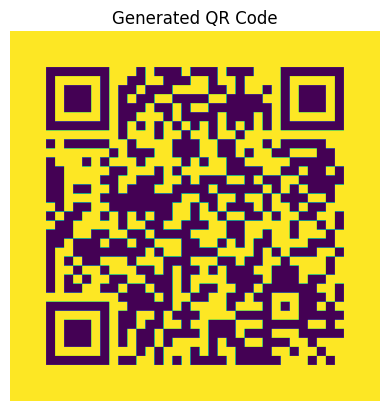

In [45]:
import matplotlib.pyplot as plt
import qrcode

def show_qr_code(data):
    qr = qrcode.QRCode(version=1, box_size=10, border=4)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill="black", back_color="white")

    # Show the QR Code Image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title("Generated QR Code")
    plt.show()

# Example Usage:
show_qr_code(encrypted_qr_data)  # Show the QR code with encrypted data


VISUALIZING THE **RESULTS**

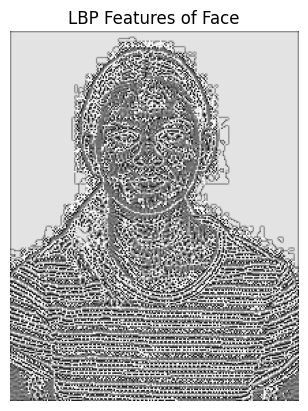

In [47]:
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
import cv2

def show_lbp(image_path):
    # Load the face image and convert it to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply LBP to the face image
    lbp_image = local_binary_pattern(image, LBP_POINTS, LBP_RADIUS, method='uniform')

    # Visualize the LBP image
    plt.imshow(lbp_image, cmap='gray')
    plt.title("LBP Features of Face")
    plt.axis('off')
    plt.show()

# Example Usage:
show_lbp("face_image.jpg")  # Show the LBP features of the stored face image


In [48]:
pip install graphviz


In [50]:
from graphviz import Digraph

def plot_flowchart():
    dot = Digraph(comment='Offline 3-Factor Authentication')

    dot.node('A', 'Start')
    dot.node('B', 'Scan QR Code')
    dot.node('C', 'Verify Face')
    dot.node('D', 'Enter Password')
    dot.node('E', 'Authentication Successful')
    dot.node('F', 'Authentication Failed')

    dot.edges(['AB', 'BC', 'CD', 'DE'])
    dot.edge('D', 'F', label='Incorrect Password')
    dot.edge('C', 'F', label='Face Mismatch')
    dot.edge('B', 'F', label='QR Code Mismatch')

    dot.render('authentication_flowchart', format='png', view=True)

# Plot the flowchart
plot_flowchart()
